# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

sys.path.append(os.path.abspath('../scripts'))
from data_prep import create_prepared_df

pd.set_option('display.max_columns', 200)

In [2]:
df = create_prepared_df()

# Dataset

## Features

The featues for the prepared_df dataset are described below:
- `student_id`: Anonymised ID given to a student
- `Mid Semester Test Raw`: The % grade given to a student during their summative mid semester test
- `End of Semester Test Raw`: The % grade given to a student during their summative end of semester test
- `Mid Semester Test Curved`: The % grade given to a student during their summative mid semester test after being curved using the formula: $ \dfrac{10x}{\sqrt{x}} $ Where $ x $ represents  `Mid Semester Test Raw`. This value represents 20% or 30% of `Criterion A`'s calculation depending on if the student is from semester 1 or 2
- `End of Semester Test Curved (20%)`: The % grade given to a student during their summative end of semester test after being curved using the formula: $ \dfrac{10x}{\sqrt{x}} $ Where $ x $ represents `End of Semester Test Raw`. This value represents 20% of `Criterion A`'s calculation
- `Lab Completion (10%)`: The % of labs completed by the student. This value represents 10% of `Criterion A`'s calculation
- `Demo Completion %`: The % of demos completed by the student. This represents 10% or 20% of `Criterion A`'s calculation depending on if the student is from semester 1 or 2
- `Criterion A (60%)`: The sum of `Mid Semester Test Curved`, `End of Semester Test Curved (20%)`, `Lab Completion (10%)`, and `Demo Completion %`
- `Criterion A (100%)`: Scaled value of `Criterion A (60%)` to a 100% scale
- `Criterion A PS Grade (6)`: The final criterion A grade out of 6 given to the student based on `Criterion A (100%)`
- `Criterion B PS Grade (6)`: The final criterion B grade out of 6 given to the student
- `Criterion C PS Grade (12)`: The final criterion C grade out of 12 given to the student
- `Criterion D PS Grade (6)`: The final criterion D grade out of 6 given to the student
- `Overall Grade (30)`: The final grade out of 30 given to the student based on the sum of `Criterion A PS Grade (6)`, `Criterion B PS Grade (6)`, `Criterion C PS Grade (12)`, and `Criterion D PS Grade (6)`
- `Achievement Grade (7)` The final categorical transcript grade out of 7 given to the student based on `Overall Grade (30)`
- `semester`: The number of semesters of Computer Science the student has taken
- `End of Semester Formative Score (18)`: The score the student scored on the end of semester formative out of 18 marks
- `End of Semester Formative Score (%)`: The `End of Semester Formative Score (18)` as a %
- `End of Semester Formative Grade (7)`: The categorical grade out of 7 given to the student for the end of semester formative
- `End of Semester Test Raw Grade (7)`: The categorical grade out of 7 given to the student for the end of semester summative
- `End of Semester Test Curved Grade (7)`: The categorical grade out of 7 given to the student for the end of semester summative after being curved using the formula: $ \dfrac{10x}{\sqrt{x}} $ Where $ x $ represents `End of Semester Test Curved (20%)`
<Br>
<Br>
- Note: The End of Semester Formative and Summative tests taken for students in the semester 1 and 2 category was identical. The Mid semester however was different

In [3]:
df.head()

,student_id,Mid Semester Test Raw,End of Semester Test Raw,Mid Semester Test Curved,End of Semester Test Curved (20%),Lab Completion (10%),Demo Completion %,Criterion A (60%),Criterion A (100%),Criterion A PS Grade (6),Criterion B PS Grade (6),Criterion C PS Grade (12),Criterion D PS Grade (6),Overall Grade (30),Achievement Grade (7),semester,End of Semester Formative Score (18),End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw Grade (7),End of Semester Test Curved Grade (7)
0,sec21_11,83,72,91,82,100,100,55,92,6,6,12,6,30,7,2,18,100.0,7.0,5,6
1,sec21_12,78,50,88,60,100,100,50,83,5,6,12,6,27,7,2,6,33.0,1.0,3,4
2,sec21_13,80,67,89,77,100,100,53,88,6,6,12,6,30,7,2,4,22.0,1.0,5,6
3,sec21_14,53,67,73,77,100,100,50,83,5,6,12,6,27,7,2,11,61.0,4.0,5,6
4,sec21_15,73,56,85,66,100,100,50,83,5,6,10,6,26,6,2,8,44.0,2.0,4,5


In [4]:
df.shape

(59, 21)

In [5]:
df.isna().sum()

student_id                               0
Mid Semester Test Raw                    0
End of Semester Test Raw                 0
Mid Semester Test Curved                 0
End of Semester Test Curved (20%)        0
Lab Completion (10%)                     0
Demo Completion %                        0
Criterion A (60%)                        0
Criterion A (100%)                       0
Criterion A PS Grade (6)                 0
Criterion B PS Grade (6)                 0
Criterion C PS Grade (12)                0
Criterion D PS Grade (6)                 0
Overall Grade (30)                       0
Achievement Grade (7)                    0
semester                                 0
End of Semester Formative Score (18)     2
End of Semester Formative Score (%)      2
End of Semester Formative Grade (7)      2
End of Semester Test Raw Grade (7)       0
End of Semester Test Curved Grade (7)    0
dtype: int64

### Important Features

`semester`, `End of Semester Formative Score (%)`, `End of Semester Formative Grade (7)`, `End of Semester Test Raw`. `End of Semester Test Curved (20%)`, and `Achievement Grade (7)` are kept for the analysis as these are the features required by the problem statement
<br>
<br>
`End of Semester Formative Score (18)` Was not included as the examination format varies year to year. Therefore to generalise this analysis the % scores are used instead
<br>
<br>
`student_id` kept as identifier

In [6]:
wanted_columns = [
    'semester',
    'End of Semester Formative Score (%)', 
    'End of Semester Formative Grade (7)', 
    'End of Semester Test Raw',
    'End of Semester Test Raw Grade (7)', 
    'End of Semester Test Curved (20%)', 
    'End of Semester Test Curved Grade (7)',
    'Achievement Grade (7)'
]

prepared_df = df[wanted_columns]
prepared_df.head()

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7)
0,2,100.0,7.0,72,5,82,6,7
1,2,33.0,1.0,50,3,60,4,7
2,2,22.0,1.0,67,5,77,6,7
3,2,61.0,4.0,67,5,77,6,7
4,2,44.0,2.0,56,4,66,5,6


# Data Exploration

## Univariate Analysis

As the initial problem statement asks how well the formative score can be used as a prediction for summative score, entries with no values for `End of Semester Formative Score (%)` will be dropped

In [7]:
prepared_df = prepared_df.dropna(subset=['End of Semester Formative Score (%)'])

In [8]:
prepared_df.isna().sum()

semester                                 0
End of Semester Formative Score (%)      0
End of Semester Formative Grade (7)      0
End of Semester Test Raw                 0
End of Semester Test Raw Grade (7)       0
End of Semester Test Curved (20%)        0
End of Semester Test Curved Grade (7)    0
Achievement Grade (7)                    0
dtype: int64

In [9]:
prepared_df.dtypes

semester                                   int64
End of Semester Formative Score (%)      float64
End of Semester Formative Grade (7)      float64
End of Semester Test Raw                  object
End of Semester Test Raw Grade (7)         int64
End of Semester Test Curved (20%)         object
End of Semester Test Curved Grade (7)      int64
Achievement Grade (7)                     object
dtype: object

- `student_id`: Unique Identifier
- `semester`: Discrete Ratio Variable
- `End of Semester Formative Score (%)`: Continuous Variable 
- `End of Semester Formative Grade (7)`: Ordinal Variable
- `End of Semester Test Raw`: Continuous Ratio Variable
- `End of Semester Test Curved (20%)`: Continuous Ratio Variable
- `Achievement Grade (7)`: Ordinal Variable 

In [10]:
prepared_df = prepared_df.astype({
    'semester': int,
    'End of Semester Formative Score (%)': int,
    'End of Semester Formative Grade (7)': int,
    'End of Semester Test Raw': int,
    'End of Semester Test Curved (20%)': int,
    'Achievement Grade (7)': int})

In [11]:
prepared_df.head()

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7)
0,2,100,7,72,5,82,6,7
1,2,33,1,50,3,60,4,7
2,2,22,1,67,5,77,6,7
3,2,61,4,67,5,77,6,7
4,2,44,2,56,4,66,5,6


In [12]:
prepared_df.describe()

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7)
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1.771930,50.912281,3.368421,58.543860,4.070175,68.333333,4.877193,6.403509
std,0.423318,28.965670,2.272755,22.451591,1.925947,22.128951,2.000626,0.961020
min,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.000000,3.000000
25%,2.000000,33.000000,1.000000,45.000000,3.000000,55.000000,4.000000,6.000000
50%,2.000000,50.000000,3.000000,62.000000,4.000000,72.000000,5.000000,7.000000
75%,2.000000,78.000000,6.000000,78.000000,6.000000,88.000000,7.000000,7.000000
max,2.000000,100.000000,7.000000,94.000000,7.000000,100.000000,7.000000,7.000000


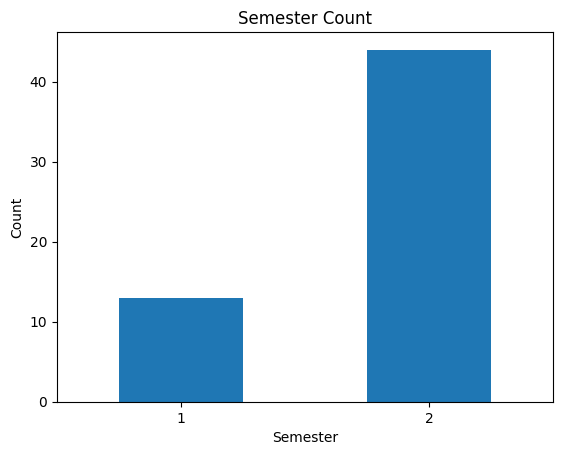

In [13]:
semester_count = prepared_df.groupby('semester').size()
semester_count.plot.bar()
plt.title('Semester Count')
plt.ylabel('Count')
plt.xlabel('Semester')
plt.xticks(rotation=0)
plt.show()

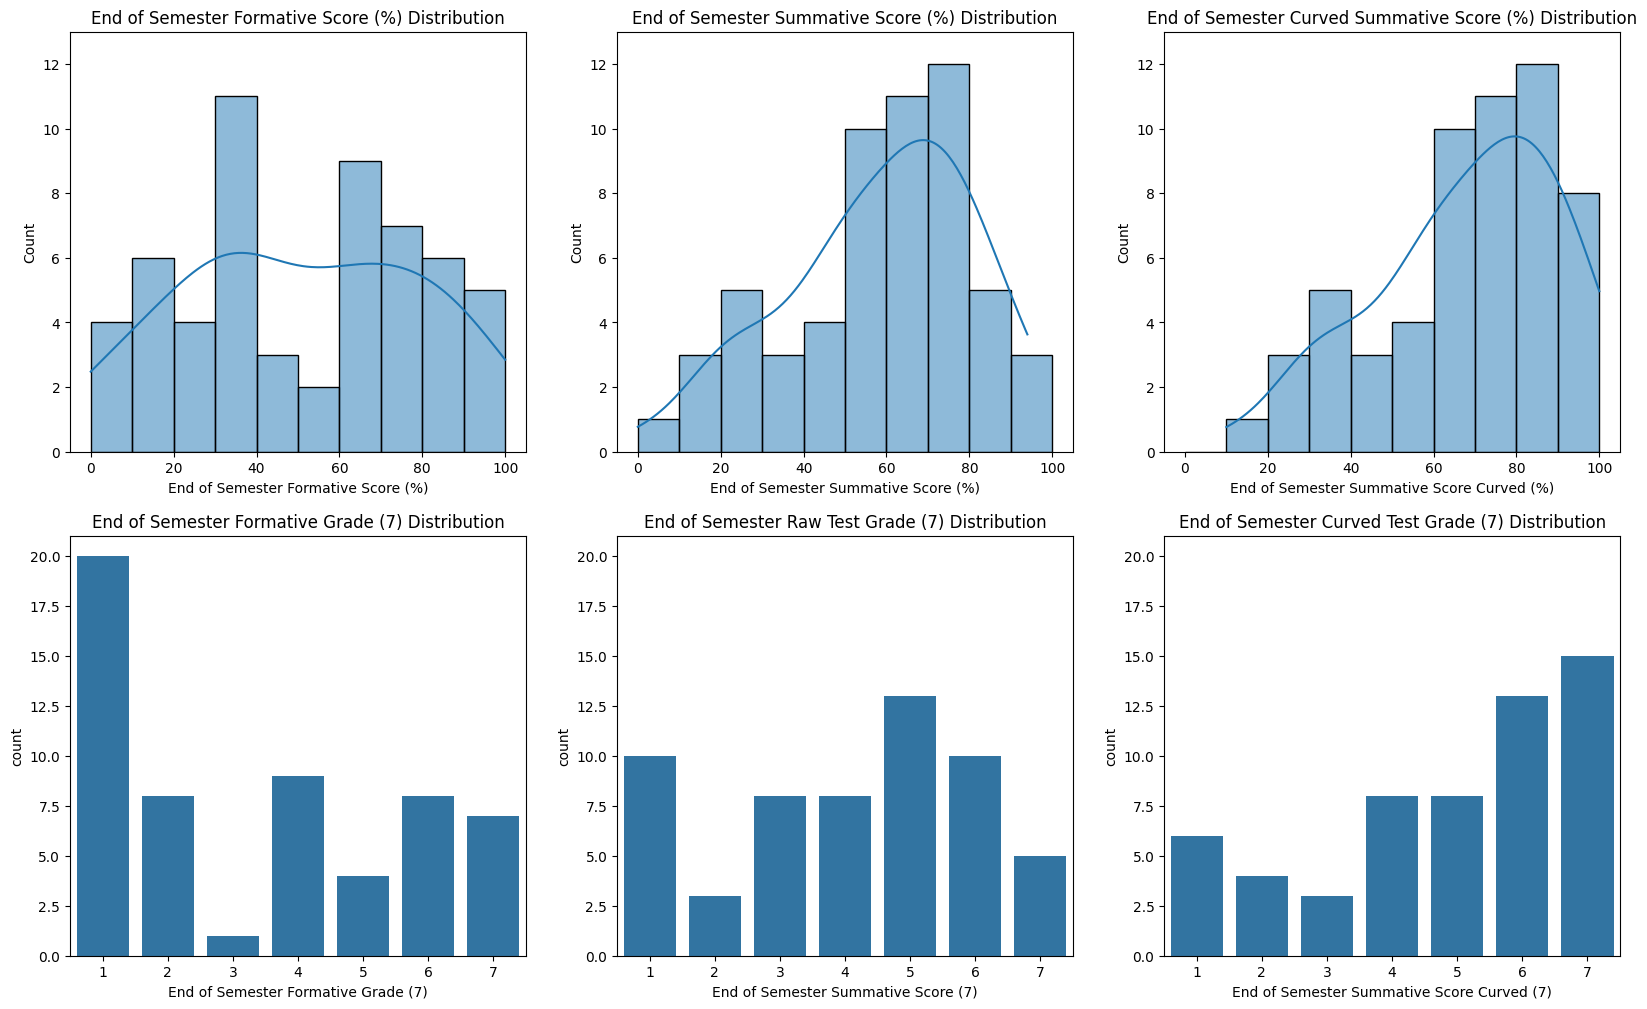

In [14]:
bins = list(range(0, 101, 10))

plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
plt.ylim((0,13))
sns.histplot(data=prepared_df, x='End of Semester Formative Score (%)', bins=bins, kde=True)
plt.title('End of Semester Formative Score (%) Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data=prepared_df, x='End of Semester Test Raw', bins=bins, kde=True)
plt.ylim((0,13))
plt.xlabel('End of Semester Summative Score (%)')
plt.title('End of Semester Summative Score (%) Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data=prepared_df, x='End of Semester Test Curved (20%)', bins=bins, kde=True)
plt.ylim((0,13))
plt.xlabel('End of Semester Summative Score Curved (%)')
plt.title('End of Semester Curved Summative Score (%) Distribution')

plt.subplot(2, 3, 4)
sns.countplot(data=prepared_df, x='End of Semester Formative Grade (7)')
plt.ylim((0,21))
plt.title('End of Semester Formative Grade (7) Distribution')

plt.subplot(2, 3, 5)
sns.countplot(data=prepared_df, x='End of Semester Test Raw Grade (7)')
plt.ylim((0,21))
plt.xlabel('End of Semester Summative Score (7)')
plt.title('End of Semester Raw Test Grade (7) Distribution')

plt.subplot(2, 3, 6)
sns.countplot(data=prepared_df, x='End of Semester Test Curved Grade (7)')
plt.ylim((0,21))
plt.xlabel('End of Semester Summative Score Curved (7)')
plt.title('End of Semester Curved Test Grade (7) Distribution')

plt.show()


- `End of Semester Formative Score (%)` appears bimodal with peaks around 30-40% and 60-70%. This might represent two groups of students: 
1. Student who do not study for a formative. 
2. Students who study for a formative
- `End of Semester Summative Score (%)` & `End of Semester Summative Score (%)` are both left-skewed, with most students scoring around 70-80% (80-90% after the curve). This highlights two things: 
1. Students on average improved their test scores after taking a formative. 
2. Most of the lower scoring students in the formative probably improved their scores significantly

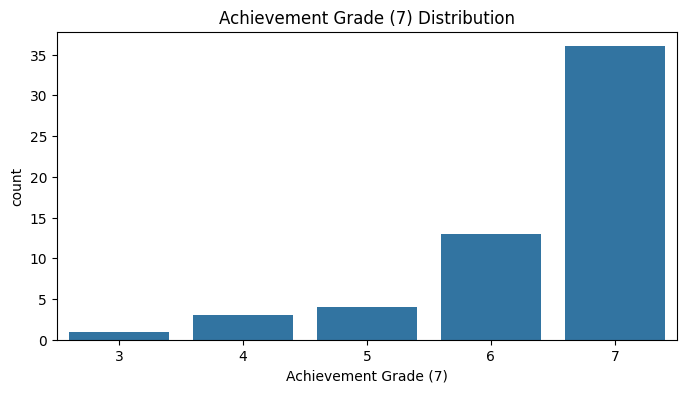

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=prepared_df, x='Achievement Grade (7)')
plt.title('Achievement Grade (7) Distribution')

plt.show()

- `Achievement Grade`s are heavily weighted towards 7s and 6s. This imbalance may make making a good predictor difficult.

## Multivariate Analysis

In [16]:
prepared_df.dtypes

semester                                 int64
End of Semester Formative Score (%)      int64
End of Semester Formative Grade (7)      int64
End of Semester Test Raw                 int64
End of Semester Test Raw Grade (7)       int64
End of Semester Test Curved (20%)        int64
End of Semester Test Curved Grade (7)    int64
Achievement Grade (7)                    int64
dtype: object

In [17]:
prepared_df.groupby('semester').mean(numeric_only=True)

,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7)
semester,,,,,,,
1,29.000000,1.769231,47.923077,3.076923,57.615385,3.769231,6.615385
2,57.386364,3.840909,61.681818,4.363636,71.500000,5.204545,6.340909


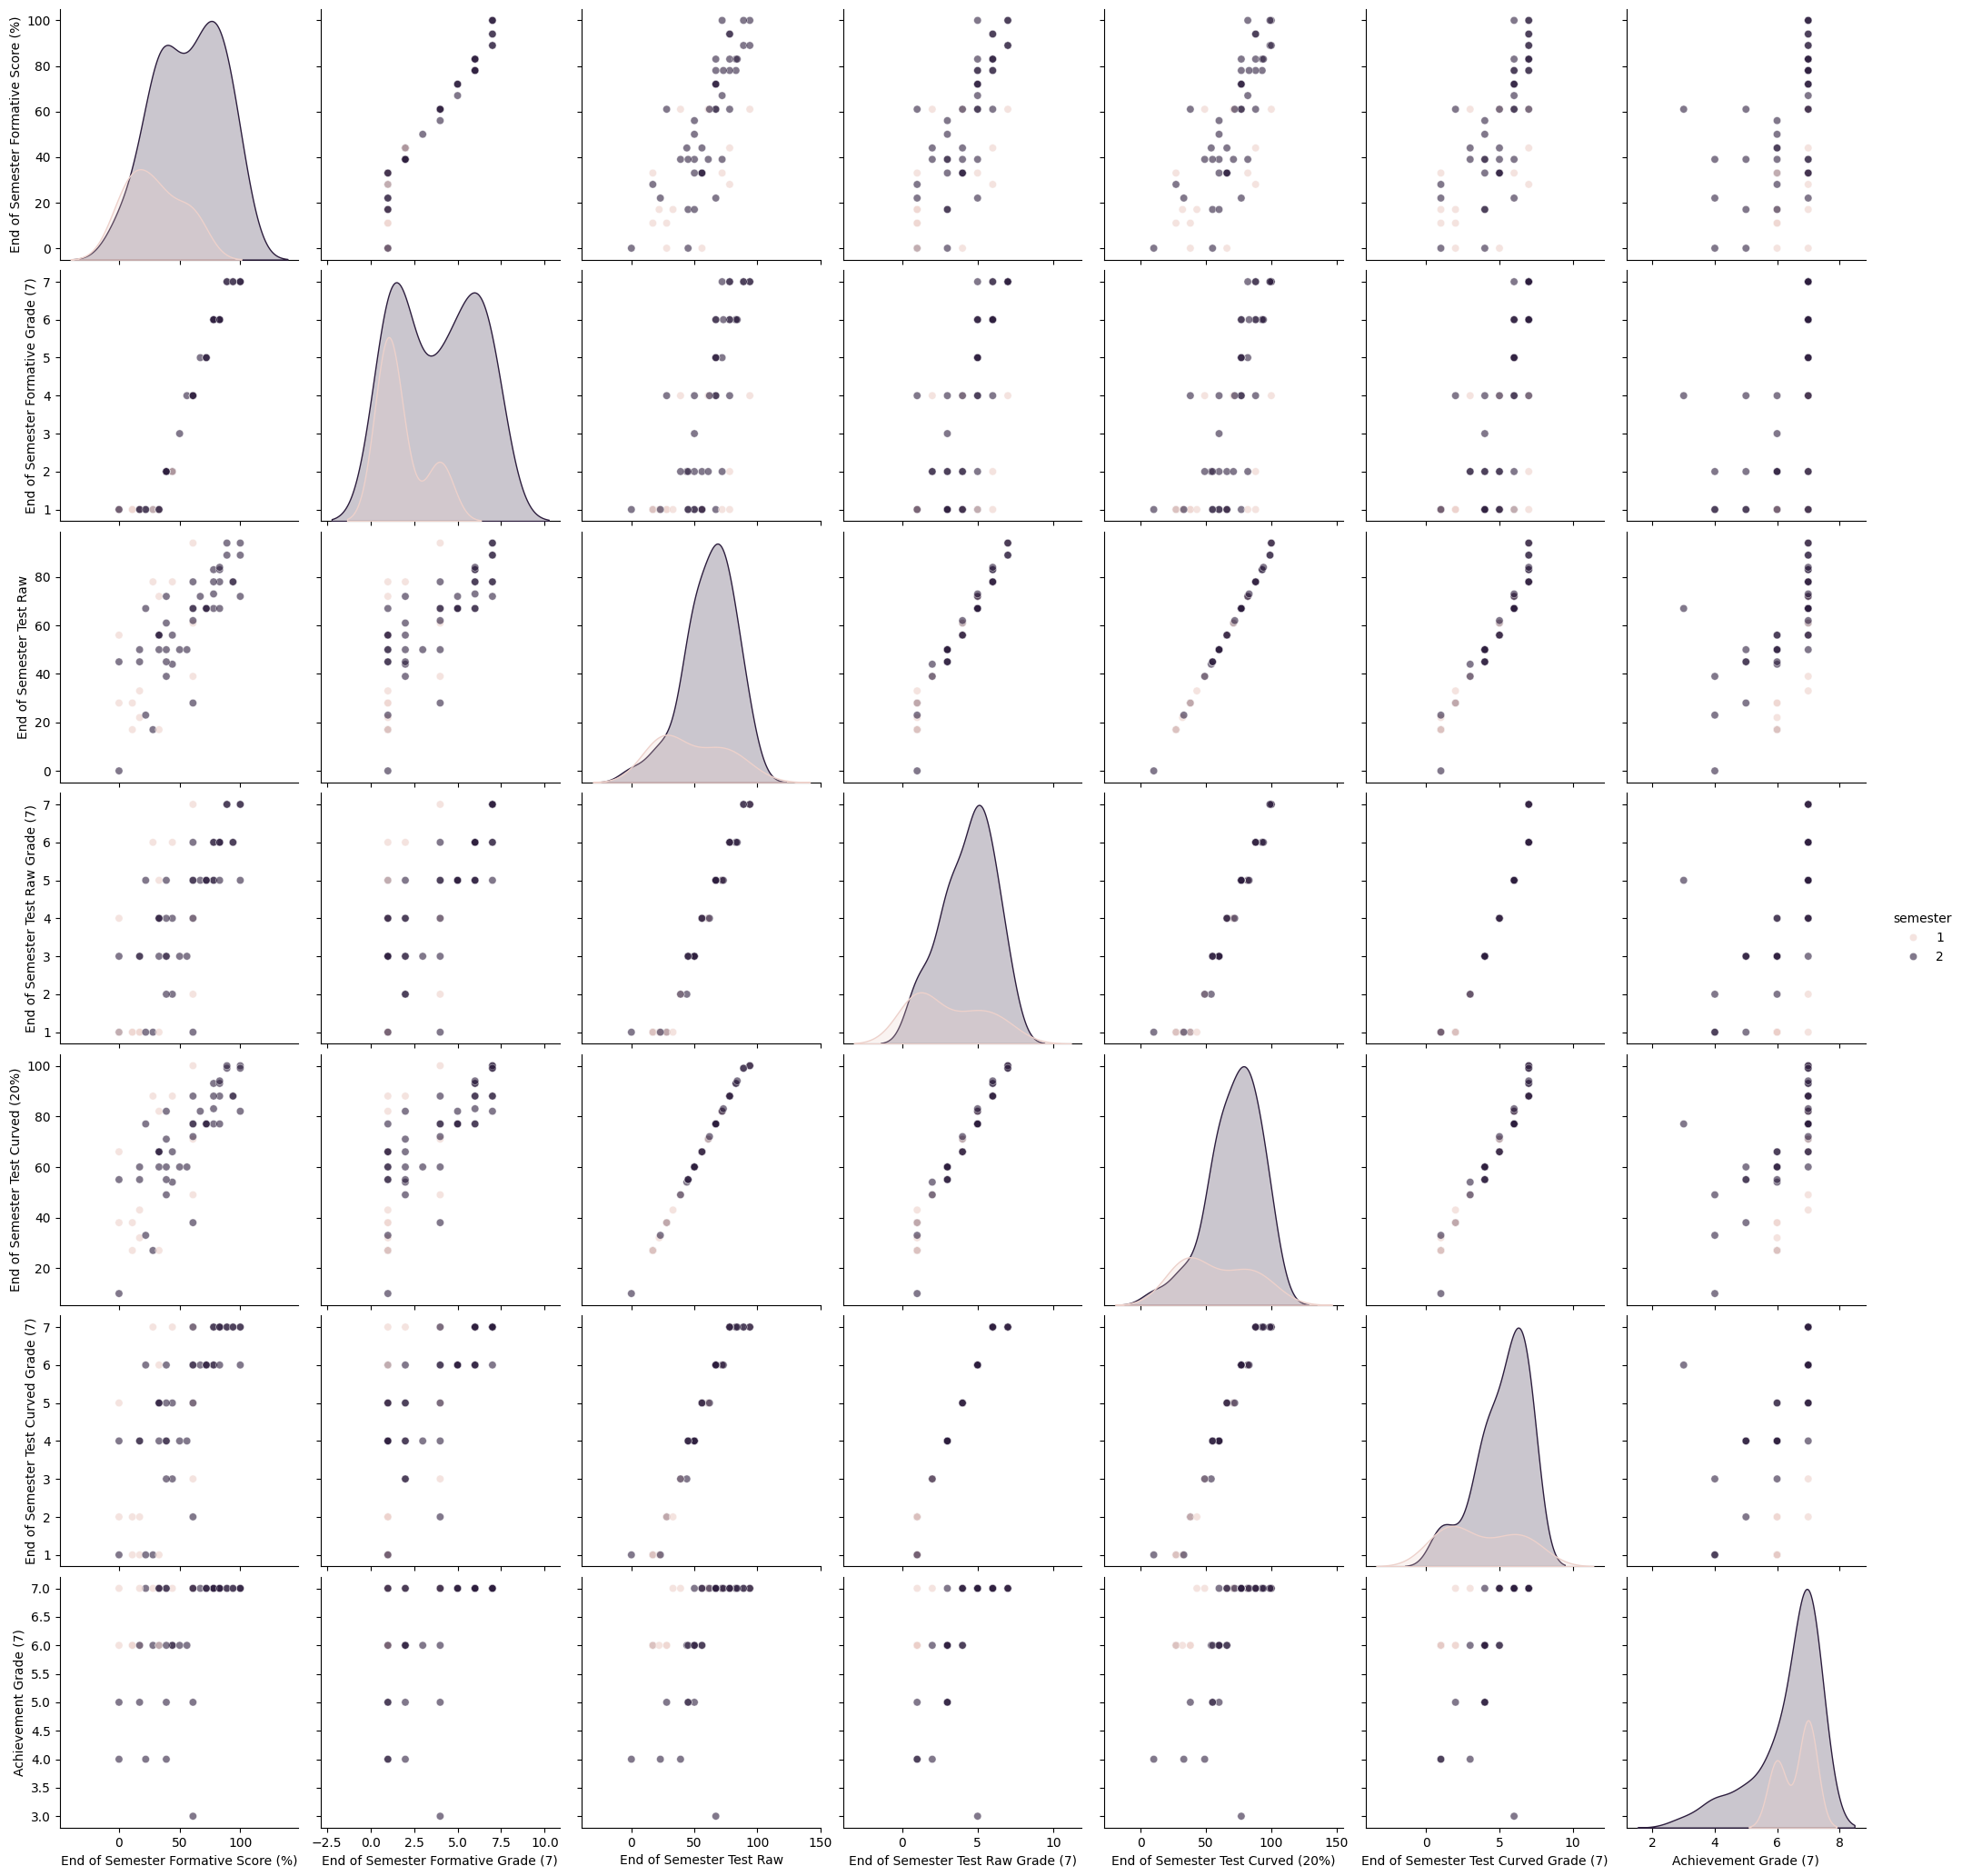

In [18]:
sns.pairplot(prepared_df, vars=['End of Semester Formative Score (%)', 
    'End of Semester Formative Grade (7)', 
    'End of Semester Test Raw', 
    'End of Semester Test Raw Grade (7)',
    'End of Semester Test Curved (20%)', 
    'End of Semester Test Curved Grade (7)',
    'Achievement Grade (7)'], 
    hue='semester', height=3, plot_kws={'alpha': 0.6})
plt.show()

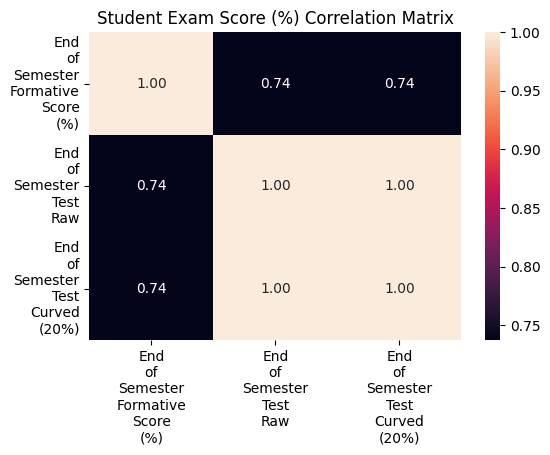

In [19]:
percentage_grades = [
    'End of Semester Formative Score (%)', 
    'End of Semester Test Raw',
    'End of Semester Test Curved (20%)']

percentage_grades_ticks = []

for s in percentage_grades:
    percentage_grades_ticks.append(s.replace(' ','\n'))
    
correlation_matrix = prepared_df[percentage_grades].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', xticklabels=percentage_grades_ticks, yticklabels=percentage_grades_ticks)
plt.title("Student Exam Score (%) Correlation Matrix")
plt.yticks(rotation=0)
plt.show()


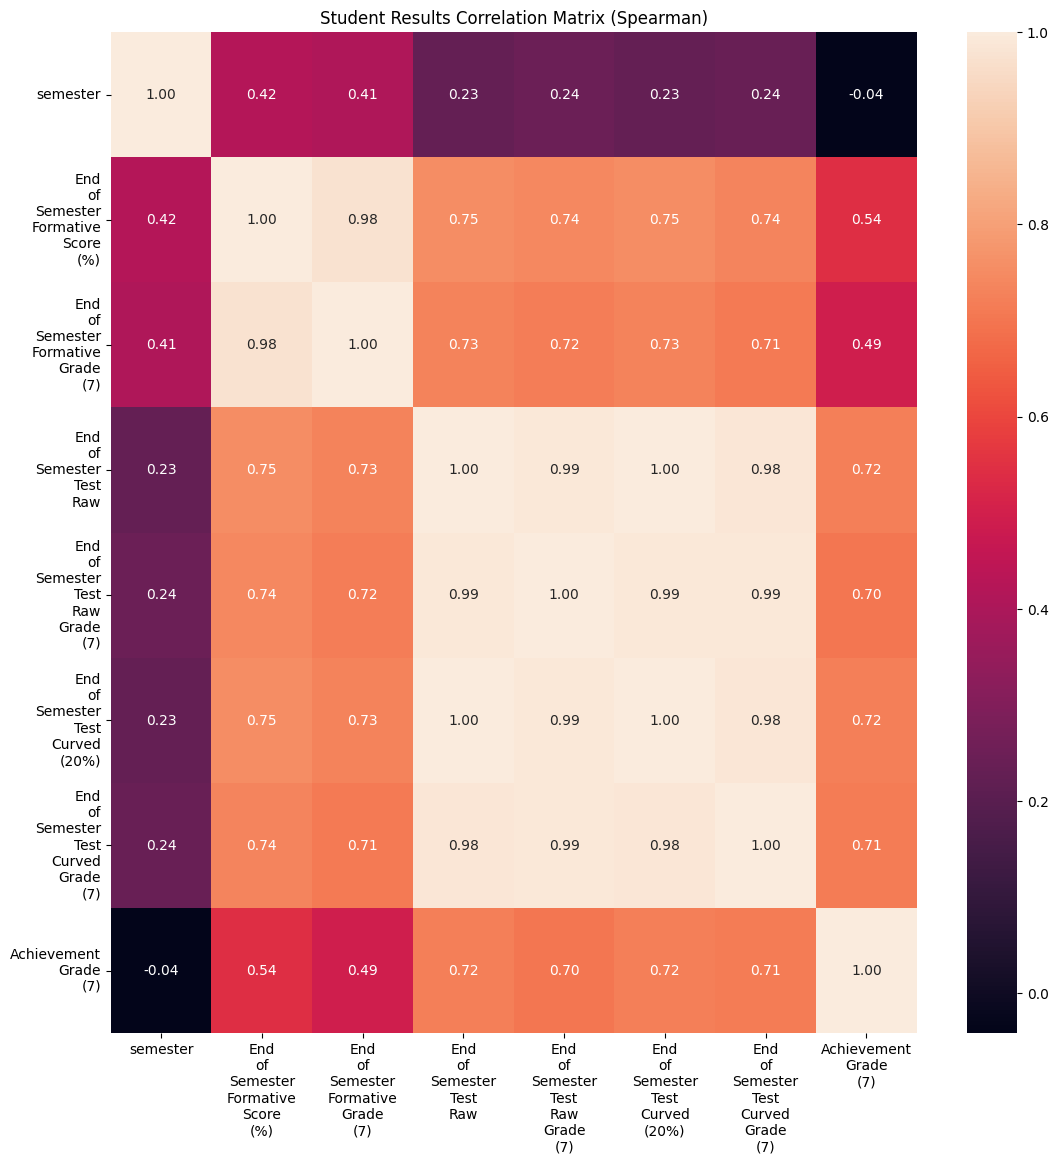

In [20]:
ticks = []

for s in wanted_columns:
    ticks.append(s.replace(' ','\n'))

correlation_matrix_spearman = prepared_df[wanted_columns].corr(method='spearman')

plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f', xticklabels=ticks, yticklabels=ticks)
plt.title("Student Results Correlation Matrix (Spearman)")
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


- The correlation matrices indicate that there is a strong correlation between doing well in the `End of Semester Formative` and the `End of Semester Summative`. However, only moderate correlation between the `End of Semester Formative` and final `Achievement Grade (7)`. Creating a model to predict `Achievement Grade (7)` based only on a single variable that is only moderately correlated may have negative ethical implications for the students and may be inappropriate to use. As the `End of Semester Summative` is only partially involved in the achievement grade, it's implication on a student is reduced and is potentially worth exploring further.
- Through feature engineering, `Achievement Grade (7)` could still be used to predict outcomes to notify whether a student is at risk or not.
- As the curved grades are more indicative of students' performance at CIS, this feature will be used over the `End of Semester Raw` grade

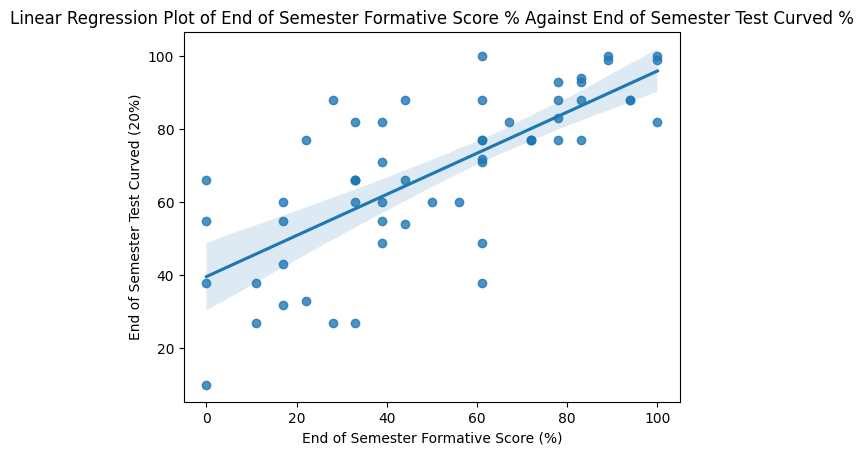

In [21]:
sns.regplot(x='End of Semester Formative Score (%)', y='End of Semester Test Curved (20%)', data=prepared_df)
plt.title('Linear Regression Plot of End of Semester Formative Score % Against End of Semester Test Curved %')
plt.show()

The points are not tight on the regression line, which indicates a minimal predictive capabilities.

Possible Directions:
- Add more predictive features
- Going the classification route to find outcomes (i.e. Grade ranges from <=3, 4-5, 6-7)

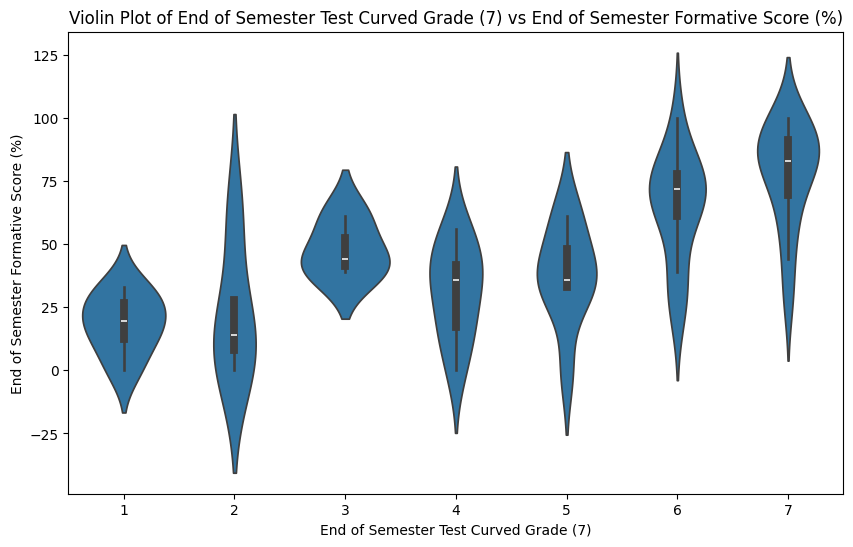

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='End of Semester Test Curved Grade (7)', y='End of Semester Formative Score (%)', data=prepared_df)
plt.title('Violin Plot of End of Semester Test Curved Grade (7) vs End of Semester Formative Score (%)')
plt.show()

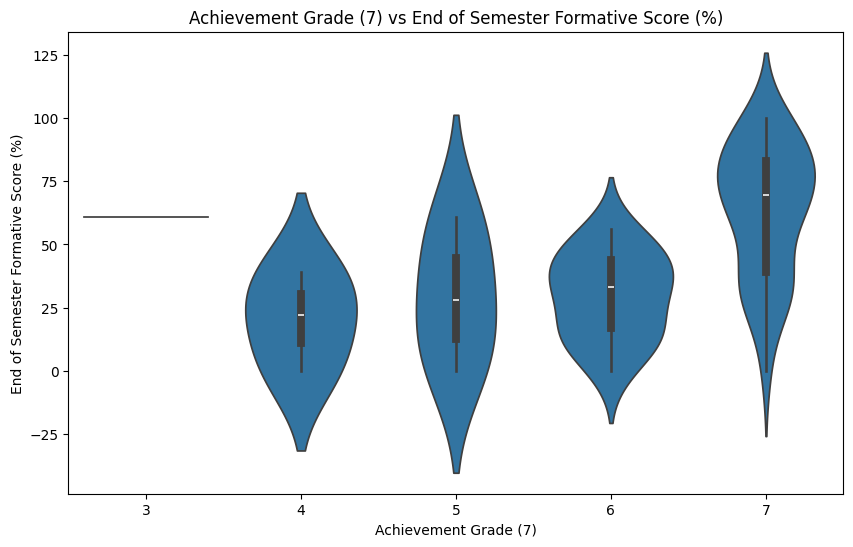

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Achievement Grade (7)', y='End of Semester Formative Score (%)', data=prepared_df)
plt.title('Achievement Grade (7) vs End of Semester Formative Score (%)')
plt.show()

- The violin plot highlights the overlapping ranges of `End of Semester Formative Score (%)` for each category of `End of Semester Test Raw Grade (7)` being similar. More features will be required.

Additional Features:
- `Semester`
- `Mid Semester Test Curved`

### TODO: Explore Mid Semester Test Curved (%)

In [24]:
wanted_columns.append('Mid Semester Test Curved')

prepared_with_mse_df = df[wanted_columns]
prepared_with_mse_df.head()

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7),Mid Semester Test Curved
0,2,100.0,7.0,72,5,82,6,7,91
1,2,33.0,1.0,50,3,60,4,7,88
2,2,22.0,1.0,67,5,77,6,7,89
3,2,61.0,4.0,67,5,77,6,7,73
4,2,44.0,2.0,56,4,66,5,6,85


In [30]:
prepared_with_mse_df.isna().sum()

semester                                 0
End of Semester Formative Score (%)      2
End of Semester Formative Grade (7)      2
End of Semester Test Raw                 0
End of Semester Test Raw Grade (7)       0
End of Semester Test Curved (20%)        0
End of Semester Test Curved Grade (7)    0
Achievement Grade (7)                    0
Mid Semester Test Curved                 0
dtype: int64

In [33]:
prepared_with_mse_df.loc[prepared_with_mse_df['End of Semester Formative Score (%)'].isna()]

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7),Mid Semester Test Curved
22,1,NaN,NaN,78,6,88,7,7,85
50,2,NaN,NaN,89,7,99,7,7,96


Repeat data type changes on new data frame (Columns with NaN values cannot be explicitly converted to int and must use the Int64 type)

In [36]:
prepared_with_mse_df.dtypes

semester                                   int64
End of Semester Formative Score (%)      float64
End of Semester Formative Grade (7)      float64
End of Semester Test Raw                  object
End of Semester Test Raw Grade (7)         int64
End of Semester Test Curved (20%)         object
End of Semester Test Curved Grade (7)      int64
Achievement Grade (7)                     object
Mid Semester Test Curved                  object
dtype: object

In [ ]:
prepared_with_mse_df = prepared_with_mse_df.astype({
    'semester': int,
    'End of Semester Formative Score (%)': 'Int64',
    'End of Semester Formative Grade (7)': 'Int64',
    'End of Semester Test Raw': int,
    'End of Semester Test Curved (20%)': int,
    'Achievement Grade (7)': int,
    'Mid Semester Test Curved': int
})

Given that this new analysis doesn't only depend on end of semester formative scores, null values for these should not be removed as the number of observations (59) in this data is limited. Removing 2 data points would equate to 3.3% of observations. Therefore an imputation method should be chosen.
<br>
<br>
As both students were high performing students, choosing a simple imputation method like mean/median/mode may not have captured this well. Moreover, the analysis above showed that semester 1 students performed significantly lower in the end of semester formative compared to the semester 2 students. Therefore to capture the interplay between all the variables in the dataframe, MICE was used to impute the missing data in `End of Semester Formative Score (%)` and `End of Semester Formative Grade (7)` 

In [43]:
mice_imputer = IterativeImputer()

imputed = mice_imputer.fit_transform(prepared_with_mse_df)
imputed_df = pd.DataFrame(imputed, columns=prepared_with_mse_df.columns)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [46]:
imputed_df.head()

,semester,End of Semester Formative Score (%),End of Semester Formative Grade (7),End of Semester Test Raw,End of Semester Test Raw Grade (7),End of Semester Test Curved (20%),End of Semester Test Curved Grade (7),Achievement Grade (7),Mid Semester Test Curved
0,2.0,100.0,7.0,72.0,5.0,82.0,6.0,7.0,91.0
1,2.0,33.0,1.0,50.0,3.0,60.0,4.0,7.0,88.0
2,2.0,22.0,1.0,67.0,5.0,77.0,6.0,7.0,89.0
3,2.0,61.0,4.0,67.0,5.0,77.0,6.0,7.0,73.0
4,2.0,44.0,2.0,56.0,4.0,66.0,5.0,6.0,85.0


In [ ]:
imputed_df.iloc[22]

semester                                  1.000000
End of Semester Formative Score (%)      42.279412
End of Semester Formative Grade (7)       2.705440
End of Semester Test Raw                 78.000000
End of Semester Test Raw Grade (7)        6.000000
End of Semester Test Curved (20%)        88.000000
End of Semester Test Curved Grade (7)     7.000000
Achievement Grade (7)                     7.000000
Mid Semester Test Curved                 85.000000
Name: 22, dtype: float64

In [45]:
imputed_df.iloc[50]

semester                                  2.000000
End of Semester Formative Score (%)      92.032253
End of Semester Formative Grade (7)       6.430925
End of Semester Test Raw                 89.000000
End of Semester Test Raw Grade (7)        7.000000
End of Semester Test Curved (20%)        99.000000
End of Semester Test Curved Grade (7)     7.000000
Achievement Grade (7)                     7.000000
Mid Semester Test Curved                 96.000000
Name: 50, dtype: float64

In [47]:
mid_semester_test_curved_values = imputed_df['Mid Semester Test Curved'].values.copy()
mid_semester_test_curved_values.sort()
print(f'Values of Mid Semester Test Curved: {mid_semester_test_curved_values}')



Values of Mid Semester Test Curved: [40. 46. 57. 63. 63. 65. 66. 66. 67. 67. 68. 69. 69. 71. 71. 72. 73. 74.
 75. 77. 77. 77. 79. 79. 79. 81. 83. 83. 84. 84. 85. 85. 85. 85. 85. 85.
 87. 87. 88. 88. 88. 89. 89. 89. 89. 91. 91. 92. 94. 94. 94. 95. 95. 96.
 96. 96. 97. 97. 97.]


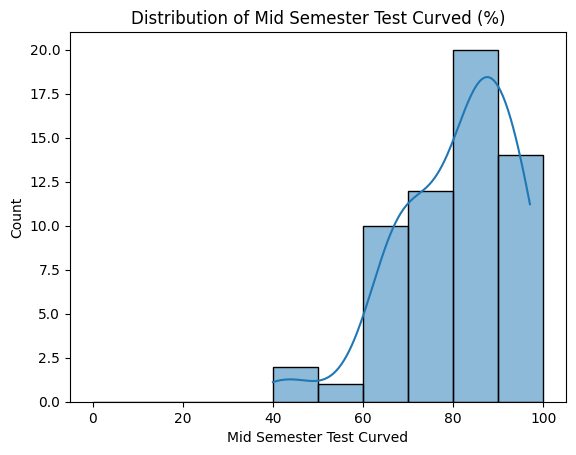

In [48]:
sns.histplot(imputed_df['Mid Semester Test Curved'], bins=bins, kde=True)
plt.title('Distribution of Mid Semester Test Curved (%)')
plt.show()

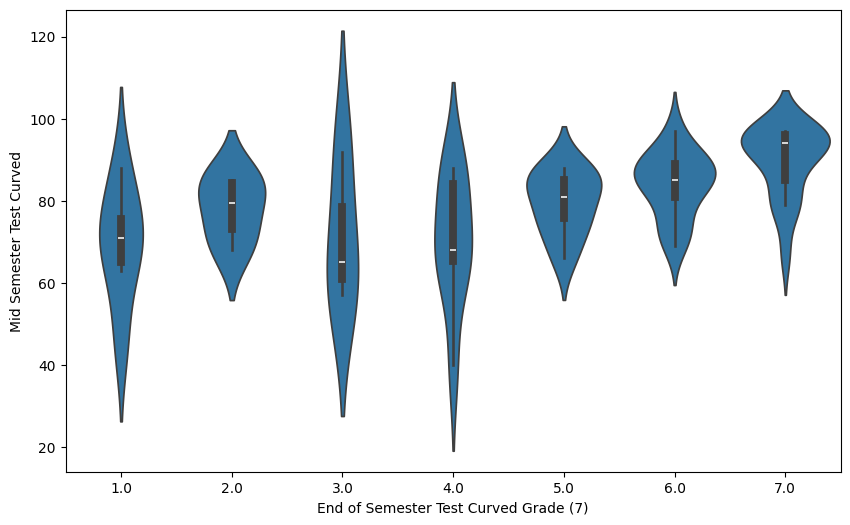

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='End of Semester Test Curved Grade (7)', y='Mid Semester Test Curved', data=imputed_df)
plt.show()

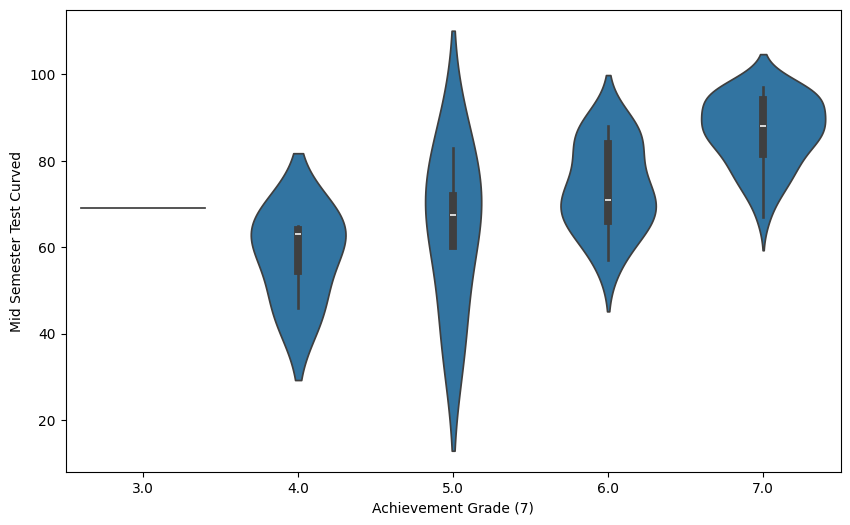

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Achievement Grade (7)', y='Mid Semester Test Curved', data=imputed_df)
plt.show()

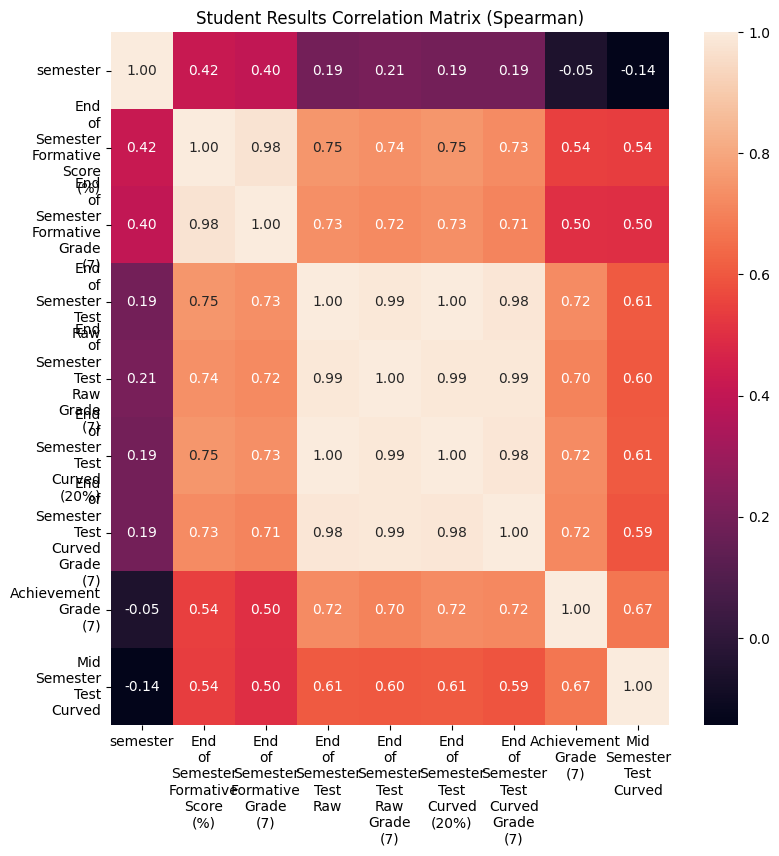

In [53]:
ticks = []

for s in wanted_columns:
    ticks.append(s.replace(' ','\n'))

correlation_matrix_spearman = imputed_df[wanted_columns].corr(method='spearman')
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f', xticklabels=ticks, yticklabels=ticks)
plt.title("Student Results Correlation Matrix (Spearman)")
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

- Note, maybe should add observations with missing values back. Create a new python file to do this

# Feature Engineering